```
To start, we need to import three dependencies:

JSON library to extract the Wikipedia data
Pandas library to create DataFrames
NumPy library for converting data types
```

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
file_dir = 'D:\\Users\\Faramarz\\UofT\\ClassProjects\\Module8-ETL\\Assignment'

```
read_json method that comes built into the Pandas library only works well for 
data that is already clean—for example, when the JSON data has every field filled 
in every time it is returned. We call data like this "flat."
```

In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [9]:
print ("kaggle metadata dataset size: " + str(kaggle_metadata.count()))
print ("ratings dataset size: " + str(ratings.count()))

kaggle metadata dataset size: adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64
ratings dataset size: userId       26024289
movieId      26024289
rating       26024289
timestamp    26024289
dtype: int64


In [10]:
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
39846,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",NaN,26803,tt0080469,en,Breaking Glass,Breaking Glass is the story of punk singer Kat...,...,1980-10-01,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Breaking Glass,False,7.0,12.0
30593,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,73147,tt0068941,en,Metzitzim,Gote and Eli are two aging friends who don't w...,...,1973-06-06,0.0,90.0,"[{'iso_639_1': 'he', 'name': 'עִבְרִית'}]",Released,NaN,Peeping Toms,False,5.0,1.0
8636,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,27983,tt0063829,en,"Yours, Mine and Ours",When a widower with 10 children marries a wido...,...,1968-04-24,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Their wedding night set new attendence records,"Yours, Mine and Ours",False,6.2,28.0
18307,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,84505,tt0023101,en,Kongo,From a wheelchair a handicapped white man rule...,...,1932-10-01,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A white man - brutal leader of the world's las...,Kongo,False,7.3,3.0
13230,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,15033,tt0902270,en,Constantine's Sword,An exploration of the dark side of Christianit...,...,2008-04-18,0.0,0.0,[],Released,NaN,Constantine's Sword,False,4.4,4.0


In [11]:
ratings.sample(5)

,userId,movieId,rating,timestamp
2878308,29971,276,3.0,843763882
7677683,79284,364,5.0,943580595
19338971,200861,110750,3.0,1496770852
3951465,41116,71535,0.5,1465556455
24280387,252171,51255,4.0,1216106947


# Transform data

In [12]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [13]:
import csv
with open(f'{file_dir}/wikipedia-movies-samples.csv', mode='w') as file:
    wiki_movies_df.head().to_csv(file)
    wiki_movies_df[3600:3605].to_csv(file)
    wiki_movies_df.tail().to_csv(file)
    wiki_movies_df.sample(10).to_csv(file)

In [14]:
wiki_movies_df.dtypes

url                  object
year                float64
imdb_link            object
title                object
Directed by          object
                     ...   
Russian              object
Hebrew               object
Revenue              object
Operating income     object
Polish               object
Length: 193, dtype: object

In [15]:
 wiki_movies_df.count()[1]

7153

In [16]:
with open(f'{file_dir}/wikipedia-movies-count.csv', mode='w') as file:
    wiki_movies_df.count().sort_values(ascending=False).to_csv(file)

In [17]:
wiki_movies_df.describe()

,year
count,7153.000000
mean,2003.701244
std,8.215588
min,1990.000000
25%,1996.000000
50%,2004.000000
75%,2011.000000
max,2018.000000


In [18]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

## First iteration
get only the ones that have 'imdb_link' and ('Director' or 'Directed by') keys

In [20]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [21]:
wiki_movies_df = pd.DataFrame(wiki_movies)

In [22]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

## Second iteration
get only the ones that have 'imdb_link' and ('Director' or 'Directed by') keys
<br> and not 'No. of episodes'

In [23]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [24]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [25]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [26]:
with open(f'{file_dir}/wikipedia-movies-count.csv', mode='w') as file:
    wiki_movies_df.count().sort_values(ascending=False).to_csv(file)

In [27]:
import csv
with open(f'{file_dir}/wikipedia-movies-samples.csv', mode='w') as file:
    wiki_movies_df.head().to_csv(file)
    wiki_movies_df[3600:3605].to_csv(file)
    wiki_movies_df.tail().to_csv(file)
    wiki_movies_df.sample(10).to_csv(file)

In [28]:
listOfColumns = sorted(wiki_movies_df.columns.tolist())
with open(f'{file_dir}/wikipedia-movies-samples.csv', mode='w') as file:
    for l in listOfColumns:
        file.write(f"column:{l}\n\t")
        try:
            file.write("\t")
            wiki_movies_df[wiki_movies_df[l].notnull()][l].head(2).to_csv(file,index=False, encoding='utf-16')
        except UnicodeEncodeError:
            pass



In [29]:
wiki_movies_df['Traditional'][wiki_movies_df['Traditional'].notna()]

858          喜宴
1534       東宮西宮
6456        葉問3
6613         長城
6661    我們誕生在中國
Name: Traditional, dtype: object

In [30]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # Loop through a list of all alternative title keys
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # Check if the current key exists in the movie object.
        if key in movie:
            alt_titles[key] = movie[key] # add to the alternative titles dict.
            movie.pop(key) # remove the key-value pair 
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [31]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [32]:
for movie in clean_movies:
    try:
        print(movie['alt_titles'])
    except KeyError:
        pass

{'Mandarin': 'Xǐyàn', 'Traditional': '喜宴'}
{'Also known as': 'Detonator II: Night Watch'}
{'Mandarin': 'Dōng Gōng Xī Gōng', 'Simplified': '东宫西宫', 'Traditional': '東宮西宮'}
{'French': 'Le Cinquième Élément'}
{'Hangul': '원더풀 데이즈', 'McCune–Reischauer': 'Wŏndŏp‘ul teijŭ', 'Revised Romanization': 'Wondeopul deijeu'}
{'Hangul': '파이 스토리', 'McCune–Reischauer': 'P‘ai sŭt‘ori', 'Revised Romanization': 'Pai seutori'}
{'Original title': 'ואלס עם באשיר'}
{'Hepburn': 'Omoide no Mānī', 'Japanese': '思い出のマーニー', 'Literally': 'Marnie of [my] Memories'}
{'Cantonese': ['Jip', '6', 'Man', '6', 'Saam', '1'], 'Mandarin': 'Yè Wèn Sān', 'Simplified': '叶问3', 'Traditional': '葉問3'}
{'Mandarin': 'Cháng Chéng', 'Simplified': '长城', 'Traditional': '長城'}
{'Chinese': '摇滚藏獒'}
{'Simplified': '我们诞生在中国', 'Traditional': '我們誕生在中國'}
{'Yiddish': 'מנשה'}
{'Hepburn': 'Meari to Majo no Hana', 'Japanese': 'メアリと魔女の花'}
{'Arabic': 'قضية رقم ٢٣', 'Literally': 'Case No. 23', 'Romanized': 'Qadiyya raqm 23'}
{'Romanized': 'Nelyubov', 'Russia

In [33]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# Function in function

In [35]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            if key == 'McCune-Reischauer': print(key)
            movie.pop(key)
            
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    # harmonize column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

## Mystery 1-
 why do we still have 'McCune–Reischauer' ?

In [36]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [58]:
wiki_movies_df[wiki_movies_df['McCune–Reischauer'].notnull()]

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer
3413,https://en.wikipedia.org/wiki/Wonderful_Days_(...,2003,https://www.imdb.com/title/tt0353014/,Wonderful Days,NaN,"[Korean, Ji Hoon Choi, Yeong Seon Eun, In Seon...",NaN,NaN,"[July 17, 2003, (, 2003-07-17, )]","[86 Min, (Original Release), 95 Min, (Director...",...,NaN,NaN,NaN,"{'Hangul': '원더풀 데이즈', 'Revised Romanization': ...",NaN,NaN,NaN,NaN,NaN,Wŏndŏp‘ul teijŭ
4238,https://en.wikipedia.org/wiki/Shark_Bait,2006,https://www.imdb.com/title/tt0820142/,Shark Bait (AKA: The Reef: Shark Bait),NaN,"[Freddie Prinze, Jr., Evan Rachel Wood, Donal ...",NaN,NaN,"[July 7, 2006, (, 2006-07-07, ), (South Korea)]",77 minutes,...,NaN,NaN,NaN,"{'Hangul': '파이 스토리', 'Revised Romanization': '...",NaN,NaN,NaN,NaN,NaN,P‘ai sŭt‘ori


In [62]:
print(clean_movies[3413])
print(clean_movies[4238])

{'url': 'https://en.wikipedia.org/wiki/Wonderful_Days_(film)', 'year': 2003, 'imdb_link': 'https://www.imdb.com/title/tt0353014/', 'title': 'Wonderful Days', 'McCune–Reischauer': 'Wŏndŏp‘ul teijŭ', 'Starring': ['Korean', 'Ji Hoon Choi', 'Yeong Seon Eun', 'In Seong O', 'Kim Jong-kook', 'English', 'Marc Worden', 'Cathy Cavadini', 'Kirk Thornton', 'David Naughton'], 'Release date': ['July 17, 2003', '(', '2003-07-17', ')'], 'Running time': ['86 Min', '(Original Release)', '95 Min', "(Director's Cut)"], 'Country': 'South Korea', 'Language': ['Korean', 'English'], 'alt_titles': {'Hangul': '원더풀 데이즈', 'Revised Romanization': 'Wondeopul deijeu'}, 'Director': 'Kim Moon-saeng', 'Distributor': ['Palisades Tartan', '(English releases)', 'Gainax', '(Japan)', 'Pathé', '(France)'], 'Composer(s)': 'Won II', 'Producer(s)': ['Hwang K. S.', 'Kyeong Hag Lee'], 'Production company(s)': ['Endgame Productions Inc.', 'Masquerade Films', 'Maxmedia', 'Tin House Productions'], 'Writer(s)': ['Kim Moon-saeng', 'Pa

In [63]:
wiki_movies[3413]['McCune–Reischauer']

'Wŏndŏp‘ul teijŭ'

In [65]:
# this works!
for movie in wiki_movies:
    for keyw in ['McCune–Reischauer']:
        try:
            movie[keyw]
            print (movie.keys())
        except KeyError:
            pass
    

dict_keys(['url', 'year', 'imdb_link', 'title', 'Hangul', 'Revised Romanization', 'McCune–Reischauer', 'Directed by', 'Produced by', 'Written by', 'Starring', 'Music by', 'Productioncompany ', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language'])
dict_keys(['url', 'year', 'imdb_link', 'title', 'Hangul', 'Revised Romanization', 'McCune–Reischauer', 'Directed by', 'Written by', 'Starring', 'Music by', 'Edited by', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office'])


In [66]:
# this works!
for movie in wiki_movies:
    for keyw in ['McCune–Reischauer']:
        if keyw in movie:
            movie[keyw]
            print (movie.keys())


dict_keys(['url', 'year', 'imdb_link', 'title', 'Hangul', 'Revised Romanization', 'McCune–Reischauer', 'Directed by', 'Produced by', 'Written by', 'Starring', 'Music by', 'Productioncompany ', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language'])
dict_keys(['url', 'year', 'imdb_link', 'title', 'Hangul', 'Revised Romanization', 'McCune–Reischauer', 'Directed by', 'Written by', 'Starring', 'Music by', 'Edited by', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office'])


## Regular expressions

In [67]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

## drop duplicates

#### if you don't specify it drops the ones after the first one
#### or below to keep the last
#### wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True, keep='last')

In [69]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## remove columns that are mostly null

In [70]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [71]:
# Remove columns that are 90% null
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [72]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)',
       'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)',
       'imdb_id'],
      dtype='object')

In [75]:
wiki_movies_df.sample(10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
1142,https://en.wikipedia.org/wiki/World_and_Time_E...,1994,http://imdb.com/title/tt0111747,World and Time Enough,NaN,"[Gregory Giles, Matt Guidry, Kraig Swartz]",NaN,1994,90 min.,NaN,...,NaN,NaN,Eric Mueller,"[1 in 10 Films, /, Strand Releasing]",NaN,Eugene Huddleston,"[Julie Hartley, Andrew Peterson]",NaN,Eric Mueller,tt0111747
4163,https://en.wikipedia.org/wiki/Monster_House_(f...,2006,https://www.imdb.com/title/tt0385880/,Monster House,NaN,"[Mitchel Musso, Sam Lerner, Spencer Locke, Ste...",Xavier Perez Grobet,"[July 21, 2006, (, 2006-07-21, ), (United Stat...",91 minutes,United States,...,$75 million,$140.2 million,Gil Kenan,Sony Pictures Releasing,"[Fabienne Rawley, Adam P. Scott]",Douglas Pipes,"[Jack Rapke, Steve Starkey]","[Columbia Pictures, Relativity Media, ImageMov...","[Dan Harmon, Rob Schrab]",tt0385880
5943,https://en.wikipedia.org/wiki/Lil_Bub_%26_Friendz,2013,https://www.imdb.com/title/tt2877280/,Lil Bub & Friendz,NaN,NaN,Danilo Parra,"[April 18, 2013, (, 2013-04-18, ), (, Tribeca ...",65 minutes,United States,...,NaN,NaN,"[Andy Capper, Juliette Eisner]",NaN,Devin Yuceil,NaN,Juliette Eisner,Vice Media,NaN,tt2877280
561,https://en.wikipedia.org/wiki/Mo%27_Money,1992,https://www.imdb.com/title/tt0104897/,Mo' Money,NaN,"[Damon Wayans, Stacey Dash, Joe Santos, John D...",Don Burgess,"[July 24, 1992, (, 1992-07-24, )]",89 minutes,NaN,...,$15 million,"$40,227,006",Peter Macdonald,Columbia Pictures,Hubert C. de la Bouillerie,Jay Gruska,Michael Rachmil,NaN,Damon Wayans,tt0104897
6868,https://en.wikipedia.org/wiki/The_Leisure_Seeker,2018,https://www.imdb.com/title/tt3741632/,The Leisure Seeker,"[The Leisure Seeker, by, Michael Zadoorian]","[Donald Sutherland, Helen Mirren, Christian Mc...",Luca Bigazzi,"[3 September 2017, (, 2017-09-03, ), (, Venice...",112 minutes,"[Italy, France]",...,NaN,$19.3 million,Paolo Virzì,"[Sony Pictures Classics, Creative Artists Agen...",Jacopo Quadri,Carlo Virzì,"[Fabrizio Donvito, Marco Cohen, Benedetto Habib]","[Indiana Production Company, Rai Cinema]","[Paolo Virzì, Francesca Archibugi, Francesco P...",tt3741632
332,https://en.wikipedia.org/wiki/Fried_Green_Toma...,1991,https://www.imdb.com/title/tt0101921/,Fried Green Tomatoes,[Fried Green Tomatoes at the Whistle Stop Cafe...,"[Kathy Bates, Jessica Tandy, Mary Stuart Maste...",Geoffrey Simpson,"[December 27, 1991, (, 1991-12-27, )]",136 minutes,United States,...,$11 million,$119.4 million,Jon Avnet,Universal Pictures,Debra Neil-Fisher,Thomas Newman,"[Jon Avnet, Jordan Kerner]","[Act III Communications, Avnet/Kerner Producti...","[Fannie Flagg, Carol Sobieski]",tt0101921
2746,https://en.wikipedia.org/wiki/The_Tao_of_Steve,2000,https://www.imdb.com/title/tt0234853/,The Tao of Steve,NaN,"[Donal Logue, Greer Goodman, Kimo Willis, Ayel...",NaN,"[January 26, 2000, (, 2000-01-26, ), (, Sundan...",87 min,NaN,...,NaN,NaN,Jenniphr Goodman,Sony Pictures Classics,NaN,Joe Delia,Anthony Bregman,Good Machine,"[Duncan North, Greer Goodman, Jenniphr Goodman]",tt0234853
4739,https://en.wikipedia.org/wiki/The_Reader_(2008...,2008,https://www.imdb.com/title/tt0976051/,The Reader,"[Der Vorleser, by, Bernhard Schlink]","[Kate Winslet, Ralph Fiennes, David Kross, Len...","[Chris Menges, Roger Deakins]","[December 12, 2008, (, 2008-12-12, ), (United ...",124 minutes,"[Germany, [2], United States]",...,$32 million,$108.4 million,Stephen Daldry,The Weinstein Company,Claire Simpson,Nico Muhly,"[Anthony Minghella, Sydney Pollack, Donna Gigl...","[Mirage Enterprises, Neunte Babelsberg Film GmbH]",David Hare,tt0976051
4718,https://en.wikipedia.org/wiki/Nim%27s_Island,2008,https://www.imdb.com/title/tt0410377/,Nim's Island,"[Nim's Island, by, Wendy Orr]","[Abigail Breslin, Jodie Foster, Gerard Butler]",Stuart Dryburgh,"[April 4, 2008, (, 2008-04-04, )]",96 m

In [74]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [101]:
temp = wiki_movies_df.copy()
temp['RecIndex']=temp.index
temp[['RecIndex','Release date','Running time','Budget','Box office']].sample(5)

,RecIndex,Release date,Running time,Budget,Box office
4287,4287,"[11 September 2006, (, 2006-09-11, )]",111 minutes,NaN,NaN
3267,3267,"April 16, 2003",80 minutes,"$9,000,000 USD",$12.6 million
1759,1759,"[May 10, 1996, (, 1996-05-10, )]",113 minutes,$92 million,$494.5 million
1223,1223,"[1995, (, 1995, )]",38 minutes,NaN,NaN
4091,4091,"[January 24, 2006, (, 2006-01-24, ), (, Sundan...",56 minutes,NaN,NaN


In [ ]:
## Mystery 2-
 why does the index differ now?

In [258]:
temp.loc[4091] # Mystery 2

url                      https://en.wikipedia.org/wiki/Hip-Hop:_Beyond_...
year                                                                  2006
imdb_link                            https://www.imdb.com/title/tt0976039/
title                                     Hip-Hop: Beyond Beats and Rhymes
Based on                                                               NaN
Starring                 [Busta Rhymes, Chuck D, Clipse, Doug E. Fresh,...
Cinematography                                                Bill Winters
Release date             [January 24, 2006, (, 2006-01-24, ), (, Sundan...
Country                                                      United States
Language                                                           English
Director                                                        Byron Hurt
Distributor                                                            NaN
Editor(s)                                           Sabrina Schmidt Gordon
Composer(s)              

In [106]:
temp.loc[temp.RecIndex == '4091']

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,RecIndex


## Convert data types

### create series for 'Box office' columns that have values

In [108]:
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [109]:
len(wiki_movies_df)

7033

regular expression works only on strings
<br> we need to identify the non strings
<br> we create the below function for that

In [110]:
def is_not_a_string(x):
    return type(x) != str

We now identify the ones that must be converted into string

In [111]:
box_office[box_office.map(is_not_a_string)] # when you use map you pass a function that is applied to each element

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [112]:
box_office.iloc[34] # same story here???

'$2.7 million (US)'

### Having to create a new function every time we want to use the map() 
### method is cumbersome and interrupts the readability of our code.
### we define lambda for the map function 

In [113]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [114]:
some_list = ['One','Two','Three']
'Mississippi'.join(some_list) # <Mississippi> is the separator for the join fucntion to create a string

'OneMississippiTwoMississippiThree'

### Why `.apply` instead of `.map?`

In [116]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [117]:
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [118]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

### create regular expression to strip the number out of the text

In [3]:
import re

In [121]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [122]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [123]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

## create two boolean series to find the matches


In [124]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

## We cannot use `not` before the array element
```
# this will throw an error!
box_office[(not matches_form_one) and (not matches_form_two)]
``` 
## Pandas has element-wise logical operators:

### * The element-wise negation operator is the tilde: ~ (similar to "not")
### * The element-wise logical "and" is the ampersand: &
### * The element-wise logical "or" is the pipe: |

In [125]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## We can fix our pattern matches to capture more values by addressing these issues:

1- Some values have spaces in between the dollar sign and the number.<br>
2- Some values use a period as a thousands separator, not a comma.<br>
3- Some values are given as a range.<br>
4- "Million" is sometimes misspelled as "millon."

In [126]:
# fix #1
# form_one = r'\$\d+\.?\d*\s*[mb]illion'
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
# fix #1
#form_two = r'\$\d{1,3}(?:,\d{3})+'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [127]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [128]:
box_office[~matches_form_one & ~matches_form_two]

79                         $335.000
110              $4.35-4.37 million
600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1611                       $520.000
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2347                       $282.175
2665    926,423 admissions (France)
2823                       $414.000
2924                       $621.000
3088      $32 [2] –33.1 million [1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4123                       $161.000
4261             $20.7–23.9 million
4306                         $20-30
4492                   $47.7 millon
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6145             $17.5–18.4 million
6234             $41.8–41.9 

In [129]:
#Fix issue #2
#form_two = r'\$\s*\d{1,3}(?:,\d{3})+'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [130]:
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [131]:
box_office[~matches_form_one & ~matches_form_two]

110              $4.35-4.37 million
600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3088      $32 [2] –33.1 million [1]
3631                            TBA
3859             $38.9–40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4261             $20.7–23.9 million
4306                         $20-30
4492                   $47.7 millon
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6145             $17.5–18.4 million
6234             $41.8–41.9 million
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
6904                    $6.9 millon
Name: Box office, dtype: obj

In [132]:
#Fix issue # 3
#We need to include all three types of dashes, 'hyphen','em dash','en dash'
```
–	—	―	‒
En dash	Em dash	Horizontal bar	Figure dash
```
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [133]:
#Fix issue # 4
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values
```
The f-string f'{form_one}|{form_two}' will create a regular expression that matches either form_one or form_two, 
so we just need to put the whole thing in parentheses to create a capture group. 
Our final string will be f'({form_one}|{form_two})', and the full line of code to extract the data follows:
```


In [134]:
box_office.str.extract(f'({form_one}|{form_two})')


,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [135]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [136]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [138]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [139]:
wiki_movies_df.dtypes

url                       object
year                       int64
imdb_link                 object
title                     object
Based on                  object
Starring                  object
Cinematography            object
Release date              object
Running time              object
Country                   object
Language                  object
Budget                    object
Box office                object
Director                  object
Distributor               object
Editor(s)                 object
Composer(s)               object
Producer(s)               object
Production company(s)     object
Writer(s)                 object
imdb_id                   object
box_office               float64
dtype: object

In [140]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

## Parse the budget data

In [141]:
budget = wiki_movies_df['Budget'].dropna()

In [142]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [143]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [144]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)


In [148]:
len(budget)

4738

In [150]:
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [151]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [152]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [153]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

# Parse release date

In [154]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [155]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [163]:
form_one = r'(January|February|March|April|May|June|July|August|September|October|November|December)(\s\d{1,2},\s\d{4})(?:.*)'
release_date.str.extract(f'({form_one})', flags=re.IGNORECASE)[[1,2]]

,1,2
0,July,"11, 1990"
1,May,"17, 1990"
2,August,"10, 1990"
3,December,"25, 1990"
4,December,"19, 1990"
...,...,...
7071,December,"25, 2018"
7072,December,"11, 2018"
7073,November,"8, 2018"
7074,August,"31, 2018"


In [165]:
form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{1,2},\s\d{4}'
release_date.str.extract(f'({form_one})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


## FROM THE BOOK

In [166]:
#Tested on regular expressions 1 on 1: https://regex101.com/r/GMqNPK/1/ 
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [167]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [168]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [169]:
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-01-01
7074   2018-08-31
7075   2018-12-01
Name: release_date, Length: 7033, dtype: datetime64[ns]

# Parsing run time

In [170]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [171]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

# get the ones not matching the regular expression

In [172]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [173]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [174]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [175]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE).sum()

6891

In [176]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [183]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [184]:
running_time_extract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [178]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [182]:
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [179]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [180]:
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [181]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# Transform Kaggle dataset

In [185]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [193]:
kaggle_metadata[['popularity','video','budget','id','release_date','adult']]

,popularity,video,budget,id,release_date,adult
0,21.946943,False,30000000,862,1995-10-30,False
1,17.015539,False,65000000,8844,1995-12-15,False
2,11.7129,False,0,15602,1995-12-22,False
3,3.859495,False,16000000,31357,1995-12-22,False
4,8.387519,False,0,11862,1995-02-10,False
...,...,...,...,...,...,...
45461,0.072051,False,0,439050,NaN,False
45462,0.178241,False,0,111109,2011-11-17,False
45463,0.903007,False,0,67758,2003-08-01,False
45464,0.003503,False,0,227506,1917-10-21,False


In [194]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [195]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
kaggle_metadata[kaggle_metadata['adult']=='True']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19489,True,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,5422,tt0079642,it,Le notti erotiche dei morti viventi,A sailor takes an American businessman and his...,...,1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Erotic Nights of the Living Dead,False,2.2,7.0
28701,True,NaN,0,"[{'id': 80, 'name': 'Crime'}]",http://www.imdb.com/title/tt0119931/,169158,tt0119931,en,Standoff,The FBI and Texas police make ready to storm t...,...,1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Trust Will Get You Killed,Standoff,False,4.8,5.0
31934,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,44781,tt0322232,cn,發電悄嬌娃,Electrical Girl centers around a horny young w...,...,2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",Released,NaN,Electrical Girl,False,0.0,0.0
32113,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dietofsex.com/,324230,tt3094816,es,Diet of Sex,Ágata suffers from a psychological disorder wh...,...,2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,"Comedy, food, drama and sex, a lot of sex",Diet of Sex,False,4.0,12.0
39901,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,35731,tt1161951,en,Amateur Porn Star Killer 2,Shane Ryan's sequel to the disturbing Amateur ...,...,2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,False,6.3,8.0
39902,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,55774,tt1153101,en,The Band,Australian film about a fictional sub-par Aust...,...,2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Sex, drugs and Rock 'n Roll",The Band,False,3.3,7.0
40574,True,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,39922,tt0070696,da,Dværgen,Olaf and his mother run a boarding house and a...,...,1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Mother of all Dwarfsploitation films!,The Sinful Dwarf,False,5.8,13.0
41009,True,NaN,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,376004,tt4044464,en,Adulterers,A man who returns home to find his wife cheati...,...,2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love. Betrayal. Vengeance,Adulterers,False,5.2,16.0
43090,True,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,448290,tt2697688,en,Half -Life,An American scientific research facility opens...,...,NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",In Production,NaN,Half -Life,False,3.7,3.0


In [202]:
kaggle_metadata[kaggle_metadata['adult'].isin(['False','True'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [203]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [204]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [259]:
kaggle_metadata['video'] = kaggle_metadata['video'] == True

In [260]:
# Mystery # 3
# Why we are getting the False ones?
kaggle_metadata['video'].value_counts()

False    45454
Name: video, dtype: int64

In [207]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [208]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [ ]:
# Transform ratings

In [209]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [210]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [211]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count   26,024,289.00
mean             3.53
std              1.07
min              0.50
25%              3.00
50%              3.50
75%              4.00
max              5.00
Name: rating, dtype: float64

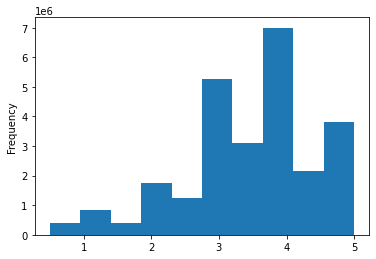

In [218]:
pd.options.display.float_format = '{:5,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [216]:
pd.options.display.float_format

<function str.format>

In [224]:
# Save the three dataframes
fileNames = ['ratings','kaggle_metadata','wiki_movies_df']
for i,df in enumerate([ratings,kaggle_metadata,wiki_movies_df]):
    df.to_pickle(f"{file_dir}/{fileNames[i]}", compression='infer', protocol=-1)




In [4]:
# To retrieve
wiki_movies_df= pd.read_pickle(f"{file_dir}/wiki_movies_df", compression='infer')
kaggle_metadata= pd.read_pickle(f"{file_dir}/kaggle_metadata", compression='infer')
ratings= pd.read_pickle(f"{file_dir}/ratings", compression='infer')

In [5]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

# resolve `title`

In [6]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [7]:
# List the non matching
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [8]:
# Kaggle seems to be more consistent
# Fist let's check if all the titles in kaggle are populated
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


```
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop Wikipedia.
```

# resolve `runtime`

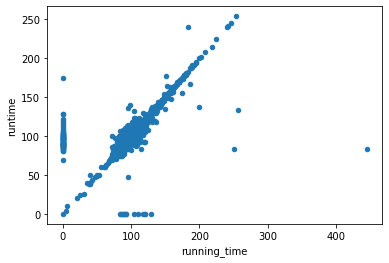

In [10]:
#use scatter plots to see how similar the runtimes are
#we first fill in the nulls with 0 so that we can plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

### Notice that there are more data points on the origin of the Y axis than on the origin of the X axis. 
### Since the X axis is Wikipedia and the Y axis is Kaggle, this means there are more missing entries 
### in the Wikipedia data set than in the Kaggle data set.
### Also, most of the runtimes are pretty close to each other but the Wikipedia data has some outliers, 
### so the Kaggle data is probably a better choice here. However, we can also see from the scatter plot 
### that there are movies where Kaggle has 0 for the runtime but Wikipedia has data, so we'll fill in the gaps with Wikipedia data.

```
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data.
```

# resolve `budget`

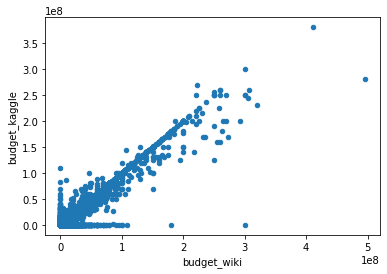

In [234]:
# use scatter plots for budget too
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [235]:
movies_df['budget_kaggle'].count()

6052

In [236]:
movies_df['budget_wiki'].count()

4388

### The Wikipedia data appears to have more outliers compared to the Kaggle data. 
### However, there are quite a few movies with no data in the Kaggle column, while Wikipedia does have budget data. 
### Therefore, we'll fill in the gaps with Wikipedia's data.

```
# Competing data:
# Wiki                     Movielens                Resolution
#-----------------------------------------------------------------------------------------------------
# budget_wiki              budget_kaggle            Keep Kaggle; fill in zeros with Wikipedia data.
```

# resolve `box office`

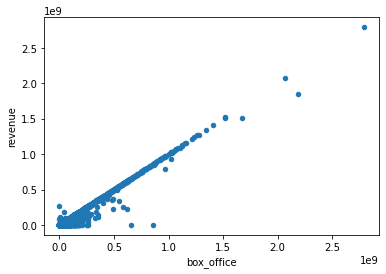

In [237]:
# use scatter plots for box office
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

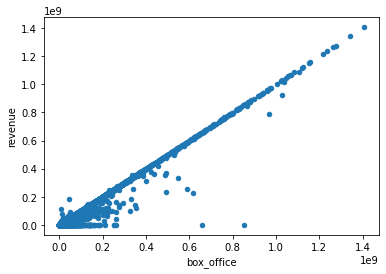

In [12]:
# do the plot for revenuews up to 1.5 billion
movies_df.fillna(0)[movies_df['box_office'] < 1.5E+09].plot(x='box_office', y='revenue', kind='scatter')

### This looks similar to what we've seen for budget, so we'll make the same decision: 
### keep the Kaggle data, but fill in the zeros with Wikipedia data.

```
# Competing data:
# Wiki                     Movielens                Resolution
#----------------------------------------------------------------------------------------------------
# box_office               revenue                  Keep Kaggle; fill in zeros with Wikipedia data.

```

# resolve `release date`

```
For release_date_wiki and release_date_kaggle, we can't directly make a scatter plot, 
because the scatter plot only works on numeric data. However, there's a tricky workaround that we can use. 
We'll use the regular line plot (which can plot date data), 
and change the style to only put dots by adding style='.' to the plot() method:
```

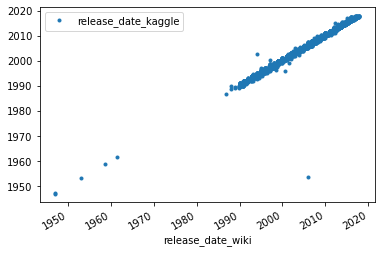

In [239]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')


We should investigate that wild outlier around 2006. We're just going to choose some rough cutoff dates to single out that one movie. We'll look for any movie whose release date according to Wikipedia is after 1996, but whose release date according to Kaggle is before 1965. Here's what your code should look like:

In [240]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",United States,English,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


 it looks like somehow The Holiday in the Wikipedia data got merged with From Here to Eternity. 
 <br>We'll have to drop that row from our DataFrame

In [241]:
# drop this record
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [242]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,United States,NaN,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,"[United States, Germany, Japan, [1]]",NaN,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,United States,English,...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,United States,NaN,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,NaN,English,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,United States,English,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,"[Denmark, USA, UK]",NaN,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,United States,English,...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


The Wikipedia data is missing release dates for 11 movies:

In [243]:
movies_df[movies_df['release_date_kaggle'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


The Wikipedia data is missing release dates for 11 movies:
```
# Competing data:
# Wiki                     Movielens                Resolution
#----------------------------------------------------------------------------------------------------
# release_date_wiki        release_date_kaggle      Drop wikipedia
```


# resolve `language`

In [244]:
# some of the languages are lists so we get an error
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

We need to convert the lists in `Language` to tuples so that the 
<br> `value_counts()` method will work. See the following code:

In [245]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                                 5479
NaN                                                      134
(English, Spanish)                                        68
(English, French)                                         35
(English, Japanese)                                       25
                                                        ... 
(Syriac, Aramaic, English, Italian)                        1
French/English                                             1
(English, Mandarin, Shanghainese)                          1
(English, Mandarin, (, Nanjing dialect, ), Japanese)       1
English, Inuktitut                                         1
Name: Language, Length: 198, dtype: int64

In [246]:
# for kaggle data there is no list
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
zh       4
pt       4
hi       2
da       2
ko       1
ab       1
he       1
ru       1
cn       1
tr       1
ar       1
sv       1
Name: original_language, dtype: int64

In [247]:
#Production companies
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


While the Wikipedia data has more information about multiple languages, 
<br>the Kaggle data is already in a consistent and usable format. 
<br>Parsing the Wikipedia data may create too many difficulties to make it worthwhile

# Put It All Together

# Competing data:
|Wiki                      |Movielens               |Resolution                                         |
|------------------------- |------------------------|---------------------------------------------------|
| title_wiki               | title_kaggle           | Drop Wikipedia.                                   |
| running_time             | runtime                | Keep Kaggle; fill in zeros with Wikipedia data.   |
| budget_wiki              | budget_kaggle          | Keep Kaggle; fill in zeros with Wikipedia data.   |
| box_office               | revenue                | Keep Kaggle; fill in zeros with Wikipedia data.   |
| release_date_wiki        | release_date_kaggle    | Drop wikipedia                                    |
| Language                 | original_language      | Drop wikipedia                                    |
| Production company(s)    | production_companies   | Drop wikipedia                                    |

In [13]:
# First, we'll drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [14]:
# Next, to save a little time, we'll make a function that fills in missing data for a column pair and then drops the redundant column.
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [15]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,2700000.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,7331647.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,6939946.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,3700000.0,104.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.2,13.0
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.0,1.0
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,4800000.0,128.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.8,26.0
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,200340.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.0,0.0


In [16]:
kaggle_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Since we've merged our data and filled in values, it's good to check that there aren't any columns with only one value, since that doesn't really provide any information. Don't forget, we need to convert lists to tuples for `value_counts()` to work.

In [19]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [18]:
movies_df['video'].value_counts(dropna=False)

False    6052
Name: video, dtype: int64

In [27]:
[ print(col) for col in movies_df.columns if len(movies_df[col].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)) == 1]

video


[None]

### We should reorder the columns to make the dataset easier to read for the hackathon participants. 
### Having similar columns near each other helps people looking through the data get a better sense of what information is available.
1- Identifying information (IDs, titles, URLs, etc.)<br>
2- Quantitative facts (runtime, budget, revenue, etc.)<br>
3- Qualitative facts (genres, languages, country, etc.)<br>
4- Business data (production companies, distributors, etc.)<br>
5- People (producers, director, cast, writers, etc.)

# Reorder columns

In [28]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [39]:
# Rename columns

In [33]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [37]:
pd.options.display.max_rows=10

In [38]:
movies_df.head(100)

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,production_countries,distributor,producers,director,starring,cinematography,editors,writers,composers,based_on
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,49000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",20th Century Fox,"[Steve Perry, Joel Silver]",Renny Harlin,"[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[David Arnott, James Cappe]","[Cliff Eidelman, Yello]","[Characters, by Rex Weiner]"
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,6000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Avenue Pictures,"[Ric Kidney, Robert Redlin]",James Foley,"[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[James Foley, Robert Redlin]",Maurice Jarre,"[the novel, After Dark, My Sweet, by, Jim Thom..."
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,35000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Daniel Melnick,Roger Spottiswoode,"[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[John Eskow, Richard Rush]",Charles Gross,"[Air America, by, Christopher Robbins]"
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,12000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Orion Pictures,Robert Greenhut,Woody Allen,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,Woody Allen,NaN,NaN
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,25000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,John Cornell,John Cornell,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,Paul Hogan,Maurice Jarre,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt0099850,11060,Internal Affairs,Internal Affairs,Trust him... he's a cop.,NaN,https://en.wikipedia.org/wiki/Internal_Affairs...,https://www.imdb.com/title/tt0099850/,114.0,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",Paramount Pictures,Frank Mancuso Jr.,Mike Figgis,"[Richard Gere, Andy García]",John A. Alonzo,Robert Estrin,Henry Bean,"[Brian Banks, Mike Figgis, Anthony Marinelli]",NaN
96,tt0099857,23981,Iron And Silk,Iron And Silk,"As a student in America, he searched for ancie...",NaN,https://en.wikipedia.org/wiki/Iron_%26_Silk_(f...,https://www.imdb.com/title/tt0099857/,92.0,NaN,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",NaN,Shirley Sun,Shirley Sun,"[Mark Salzman, Vivian Wu, Pan Qingfu, Jeanette...",James Hayman,"[James Y. Kwei, Geraldine Peroni]",Mark Salzman,Michael Gibbs,"[Iron & Silk, by Mark Salzman]"
97,tt0099871,2291,Jacob's Ladder,Jacob's Ladder,The most frightening thing about Jacob Singer'...,NaN,https://en.wikipedia.org/wiki/Jacob%27s_Ladder...,https://www.imdb.com/title/tt0099871/,113.0,25000000.0,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",TriStar Pictures,Alan Marshall,Adrian Lyne,"[Tim Robbins, Elizabeth Peña, Danny Aiello]",Jeffrey L. Kimball,Tom Rolf,Bruce Joel Rubin,Maurice Jarre,NaN
98,tt0099878,17009,Jetsons: The Movie,Jetsons: The Movie,The first movie from the family that's truly a...,NaN,https://en.wikipedia.org/wiki/Jetsons:_The_Movie,https://www.imdb.com/title/tt0099878/,82.0,NaN,...,"[{

In [41]:
movies_df.to_pickle(f"{file_dir}/movies_df_final", compression='infer', protocol=-1)

# Create summary for ratings

In [44]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

In [45]:
rating_counts.head()

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
movieId,,,,,,,,,,
1,441.0,804.0,438.0,2083.0,1584.0,11577.0,5741.0,22020.0,5325.0,15995.0
2,263.0,797.0,525.0,2479.0,1810.0,8510.0,2916.0,6035.0,690.0,2035.0
3,169.0,772.0,233.0,1665.0,616.0,6213.0,759.0,3433.0,154.0,1483.0
4,47.0,351.0,31.0,496.0,77.0,1133.0,66.0,557.0,12.0,211.0
5,237.0,785.0,270.0,1716.0,664.0,6608.0,723.0,2959.0,166.0,1130.0


In [46]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [47]:
rating_counts.head()

,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.0,804.0,438.0,2083.0,1584.0,11577.0,5741.0,22020.0,5325.0,15995.0
2,263.0,797.0,525.0,2479.0,1810.0,8510.0,2916.0,6035.0,690.0,2035.0
3,169.0,772.0,233.0,1665.0,616.0,6213.0,759.0,3433.0,154.0,1483.0
4,47.0,351.0,31.0,496.0,77.0,1133.0,66.0,557.0,12.0,211.0
5,237.0,785.0,270.0,1716.0,664.0,6608.0,723.0,2959.0,166.0,1130.0


In [49]:
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [50]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

In [51]:
movies_with_ratings_df.to_pickle(f"{file_dir}/movies_with_ratings_df", compression='infer', protocol=-1)